# <font color="#2E86C1"><b>AICE Associate 3회 모의고사</b></font>
---

## <font color="#117A65"><b>교육 플랫폼 사용자 이탈 예측</b></font>

### <font color="#5D6D7E"><b>목적</b></font>  
<b>이탈 가능성이 높은 교육 플랫폼 사용자를 사전에 예측</b>하여  
맞춤형 리텐션 마케팅, 학습 알림 강화 등 자동화된 대응이 가능하도록  
사용자 행동 및 속성 데이터를 기반으로 예측 모델을 구축합니다.

### <font color="#5D6D7E"><b>배경 시나리오</b></font>  

온라인 교육 플랫폼을 운영하는 <b>A사</b>는 최근 사용자 이탈률 증가로  
수강률 및 결제 전환율이 하락하고 있습니다.  
플랫폼을 이용하던 사용자가 일정 기간 이후 더 이상 로그인을 하지 않거나,  
콘텐츠 소비 없이 이탈하는 사례가 증가함에 따라 이를 사전에 예측하고자 합니다.

이에 따라 기업은 실제 이탈 여부 및 사용자 행동, 환경 정보를 포함한  
데이터를 수집하였으며, 아래와 같은 조건을 기반으로  
<b>이탈 여부(`leave_yn`)</b>를 예측하는 모델을 구축하려고 합니다.

---

### 📊 <font color="#5D6D7E"><b>데이터 설명</b></font>  
<b>파일 이름: `edu_users.csv`</b>

| <b>컬럼명</b>             | <b>설명</b>                                                      |
|--------------------------|------------------------------------------------------------------|
| `rate_math`              | 수학 과목 수강 시청률 비율 (%)                                           |
| `rate_science`           | 과학 과목 수강 시청률 비율 (%)                                           |
| `rate_english`           | 영어 과목 수강 시청률 비율 (%)                                           |
| `rate_humanities`        | 인문 과목 수강 시청률 비율 (%)                                           |
| `rate_art`               | 예체능 과목 수강 시청률 비율 (%)                                         |
| `tot_time`               | 총 학습 시간 (분)                                                |
| `device`                 | 접속 기기 (mobile, desktop, tablet 등)                          |
| `gender`                 | 성별 (`M`, `F`)                                                  |
| `age`                    | 연령                                                            |
| `resub_yn`               | 재수강 여부 (`Y`, `N`)                                           |
| `comb_yn`                | 융합 과목 수강 여부 (`Y`, `N`)                                   |
| `othersub_yn`            | 기타 과목 수강 여부 (`Y`, `N`)                                   |
| `leave_yn`               | <mark><b>이탈 여부 (1: 이탈, 0: 유지)</b></mark> ← <b>예측 대상</b> |



### 문제 1. 라이브러리 불러오기

🎯 목표  
데이터 분석을 위해 pandas, numpy, seaborn, matplotlib 라이브러리를 불러옵니다.

📑 조건  
- pandas를 `pd`, numpy를 `np`, seaborn을 `sns`, matplotlib.pyplot을 `plt`로 임포트하세요.

In [1]:
# 여기에 답안을 작성하세요.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

##### **정답코드**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 문제 2. 데이터 파일 불러오기

🎯 목표  
edu_users.csv 파일을 불러와 edu_df 데이터프레임을 생성합니다.

📑 조건
- pandas를 이용하여 파일을 읽고 `edu_df`에 저장하세요.

In [3]:
# 여기에 답안을 작성하세요.
edu_df = pd.read_csv('datasets/edu_users.csv')

##### **정답코드**

In [ ]:
edu_df = pd.read_csv('edu_users.csv')


### 문제 3. 데이터프레임 구조 확인

🎯 목표  
데이터의 전체 구조(변수 타입, 결측치 여부 등)를 파악하여 이 정보를 바탕으로 다음 중 **옳지 않은 설명**을 고르세요.

📑 조건  
- edu_df에 대해 .info()를 출력하세요.
- 정답 번호를 `답03` 변수에 저장하세요.

1. `rate_math`, `rate_science`, `tot_time`은 결측치가 존재하며, 모두 실수형(`float64`)이다.  
2. `device`, `gender`, `resub_yn`, `comb_yn`, `othersub_yn`은 범주형 변수이지만, `dtype`은 모두 `object`로 표시된다.  
3. 전체 열은 13개이며, 이 중 수치형(numeric) 변수는 총 8개다.  
4. `leave_yn`은 이탈 여부를 나타내는 이진 분류형 변수이며, 문자형(object)으로 저장되어 있다.

In [12]:
# 여기에 답안을 작성하세요.
edu_df.info()
답03 = 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_math        1188 non-null   float64
 1   rate_science     1188 non-null   float64
 2   rate_english     1250 non-null   float64
 3   rate_humanities  1250 non-null   float64
 4   rate_art         1250 non-null   float64
 5   tot_time         1188 non-null   float64
 6   device           1250 non-null   object 
 7   gender           1250 non-null   object 
 8   age              1250 non-null   int64  
 9   resub_yn         1250 non-null   object 
 10  comb_yn          1250 non-null   object 
 11  othersub_yn      1250 non-null   object 
 12  leave_yn         1250 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 127.1+ KB


##### **정답코드**

In [ ]:
edu_df.info()
답03 = 4


### 문제 4. 주요 과목 시청률 상관관계 분석

🖋 상황 설명  
주요 과목 시청률 간의 상관관계를 분석합니다.

🎯 목표
- 아래 셀을 실행하여 corr_list 변수를 생성하세요.


In [14]:
corr_list = ['rate_math', 'rate_science', 'rate_english', 'rate_humanities', 'rate_art']


📑 조건
- corr_list를 활용하여 heatmap을 시각화하고 해석하여, 가장 적절한 설명을 고르세요.
- 정답은 '답04' 변수에 저장하세요
- annot = True
- 소수점은 2째자리까지만 출력

1. `rate_math`와 `rate_science`는 강한 양의 상관관계를 가진다.  
2. `rate_english`와 `rate_humanities`는 -0.5 이상의 음의 상관관계를 가진다.  
3. 전체 과목 간 상관계수는 거의 없으며, 독립적인 경향을 보인다.  
4. `rate_art`와 다른 과목들은 대체로 양의 상관관계를 가진다.

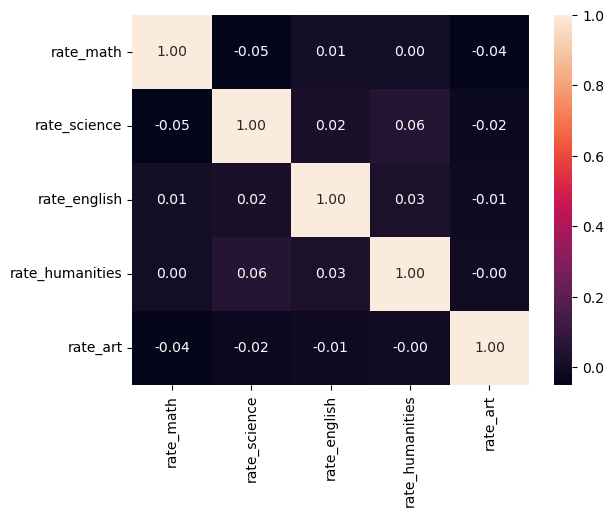

In [21]:
# 여기에 답안을 작성하세요.
sns.heatmap(data=edu_df[corr_list].corr(),
            annot = True,
            fmt = ".2f")
답04 = 3

##### **정답코드**

In [ ]:
sns.heatmap(data=edu_df[corr_list].corr(),
            annot=True,     
            fmt=".2f")
답04 = 3


### 문제 5. 이탈 여부에 따른 학습 시간 분포 시각화

🎯 목표  
이탈 그룹과 유지 그룹 간 학습 시간 분포를 비교합니다.

📑 조건
- leave_yn 별로 tot_time의 boxplot을 그리고, 이를 바탕으로 다음 보기 중 **올바른 해석**을 고르세요.

1. 유지 사용자(0)는 이탈 사용자(1)보다 평균 학습 시간이 짧고, 이상치가 거의 없다.  
2. 이탈 사용자(1)의 중앙값은 유지 사용자(0)보다 높으며, 전체적인 학습 시간도 길다.  
3. 유지 사용자(0)의 학습 시간 분포가 더 넓고 이상치도 더 많이 존재한다.  
4. 두 그룹 모두 중앙값은 유사하나, 이탈자 쪽이 이상치에 의해 상자 높이가 극단적으로 커졌다.

- 정답은 `답05` 변수에 저장

In [25]:
edu_df.groupby('leave_yn')['tot_time'].mean()

leave_yn
0    30.100378
1    28.832180
Name: tot_time, dtype: float64

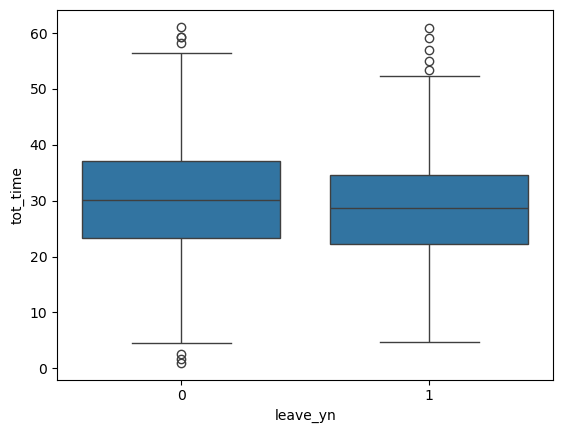

In [27]:
# 여기에 답안을 작성하세요.
sns.boxplot(data=edu_df, x='leave_yn', y='tot_time')
답05 = 3

##### **정답코드**

In [ ]:
sns.boxplot(data=edu_df, x='leave_yn', y='tot_time')
답05 = 3


### 문제 6. 이탈 여부별 주요 과목 평균 시청률 계산

🎯 목표  
이탈 여부에 따른 과목 시청률 평균을 비교합니다.

📑 조건
- leave_yn 별로 rate_math, rate_science의 평균을 pivot_table()을 이용하여 만드세요.


In [29]:
# 여기에 답안을 작성하세요.
pivot_df = edu_df.pivot_table(
    index='leave_yn',
    values = ['rate_math', 'rate_science'],
    aggfunc='mean')
pivot_df

,rate_math,rate_science
leave_yn,,
0,0.487965,0.496375
1,0.515511,0.505424


##### **정답코드**

In [ ]:
pivot_df = edu_df.pivot_table(
    index='leave_yn',
    values=['rate_math', 'rate_science'],
    aggfunc='mean'
)
pivot_df


### 문제 7. 결측치 처리

🎯 목표  
결측치를 적절히 처리하여 데이터 품질을 향상시킵니다.

📑 조건  
- rate_math 컬럼의 결측치를 평균(mean)으로 채우세요.
- rate_science 컬럼의 결측치를 중앙값(median)으로 채우세요. 
- tot_time 컬럼의 결측치를 최빈값(mode)으로 채우세요.


In [31]:
# 여기에 답안을 작성하세요.
edu_df['rate_math'].fillna(edu_df['rate_math'].mean(), inplace=True)
edu_df['rate_science'].fillna(edu_df['rate_science'].median(), inplace=True)
edu_df['tot_time'].fillna(edu_df['tot_time'].mode(), inplace=True)

C:\Users\MEDIA-CAM2\AppData\Local\Temp\ipykernel_14632\1917176306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edu_df['rate_math'].fillna(edu_df['rate_math'].mean(), inplace=True)
C:\Users\MEDIA-CAM2\AppData\Local\Temp\ipykernel_14632\1917176306.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

##### **정답코드**

In [ ]:
edu_df['rate_math'].fillna(edu_df['rate_math'].mean(), inplace=True)
edu_df['rate_science'].fillna(edu_df['rate_science'].median(), inplace=True)
edu_df['tot_time'].fillna(edu_df['tot_time'].mode()[0], inplace=True)


### 문제 8. train/test 데이터 분리

🎯 목표  
Feature(X)와 Target(y)을 이용하여 모델 학습과 평가를 위해 분리하려고 합니다.

📑 조건  
- Feature: rate_math, rate_science, rate_english, tot_time
- Target: leave_yn
- 데이터셋을 분리하기 위해 train_test_split을 import하세요.
- 훈련 데이터 셋 = X_train, y_train
- 검증 데이터 셋 = X_valid, y_valid
- random_state=42
- 훈련 데이터셋과 검증 데이터셋의 비율은 8:2


In [40]:
# 여기에 답안을 작성하세요.
Feature = edu_df[['rate_math', 'rate_science', 'rate_english', 'tot_time']]
Target = edu_df['leave_yn']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Feature, Target, random_state=42, test_size=0.2)

##### **정답코드**

In [ ]:
Feature = edu_df[['rate_math', 'rate_science', 'rate_english', 'tot_time']]
Target = edu_df['leave_yn']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Feature, Target, test_size=0.2, random_state=42)


### 문제 9. Feature 스케일링

🎯 목표  
데이터 스케일링을 통해 모델 학습의 성능을 높입니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 StandardScaler를 불러오세요.


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

📑 조건  
- StandardScaler를 이용해 Feature 데이터를 스케일링하세요.
- X_train은 fit_tranform을 이용하여 X_train 변수에 저장
- X_valid는 transform을 이용하여 X_test의 변수에 저장


In [45]:
# 여기에 답안을 작성하세요.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_valid)

##### **정답코드**

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_valid)


### 문제 10. 랜덤포레스트 모델 학습

🎯 목표  
랜덤포레스트 모델을 활용하여 이탈 여부를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 RandomForestClassifier를 불러오세요.


In [47]:
from sklearn.ensemble import RandomForestClassifier


📑 조건  
- RandomForestClassifier를 사용해 leave_yn을 예측하는 모델을 학습하세요.
- 랜덤포레스트모델을 rfc변수에 저장하세요.
- n_estimators=150, max_depth=7, min_samples_split=5, random_state=42
- 훈련은 스케일링 처리된 데이터를 사용해 주세요.



In [49]:
# 여기에 답안을 작성하세요.
rfc = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=5, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=150,
                       random_state=42)

##### **정답코드**

In [ ]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=5, random_state=42)

rfc.fit(X_train,y_train)


### 문제 11. XGBoost 모델 학습

🎯 목표  
XGBoost를 활용하여 이탈 여부를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 XGBClassifier를 불러오세요.


In [51]:
from xgboost import XGBClassifier


📑 조건  
- XGBClassifier를 사용해 leave_yn을 예측하는 모델을 학습하세요.
- XGBoost모델을 xgbc변수에 저장하세요.
- n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42
- 훈련은 스케일링 처리된 데이터를 사용하여 주세요.


In [53]:
# 여기에 답안을 작성하세요.
xgbc = XGBClassifier(n_estimators = 200, max_depth = 5, learning_rate = 0.1, random_state = 42)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

##### **정답코드**

In [ ]:
xgbc = XGBClassifier(n_estimators = 200, max_depth = 5, learning_rate = 0.1, random_state = 42)
xgbc.fit(X_train, y_train)


### 문제 12. 모델 성능 평가

🎯 목표  
학습된 모델의 정확도와 F1 점수를 비교합니다.

📑 조건  
- randomforest의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 rfc_predict변수에 저장하여 주세요.
- xgboost의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 xgbc_predict변수에 저장하여 주세요.
- accuracy_score와 f1_score를 사용하여 두 모델의 성능을 비교하고, 정확도가 더 높은 모델을 답12 변수에 저장하세요.(예 : 답12 = 'RF' or 'XGBC')  


In [59]:
# 여기에 답안을 작성하세요.
from sklearn.metrics import accuracy_score, f1_score

rfc_predict = rfc.predict(X_valid)
xgbc_predict = xgbc.predict(X_valid)

print('RandomForest')
print('RF acc ', accuracy_score(y_valid, rfc_predict))
print('RF f1 ', f1_score(y_valid, rfc_predict))

print('XGBoost')
print('XGB acc ', accuracy_score(y_valid, xgbc_predict))
print('XGB f1 ', f1_score(y_valid, xgbc_predict))
답12 = 'XGBC'

RandomForest
RF acc  0.428
RF f1  0.3700440528634361
XGBoost
XGB acc  0.628
XGB f1  0.24390243902439024


C:\Users\MEDIA-CAM2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


##### **정답코드**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

rfc_predict = rfc.predict(X_valid)
xgbc_predict = xgbc.predict(X_valid)

print("Random Forest")
print("Accuracy:", accuracy_score(y_valid, rfc_predict))
print("F1 Score:", f1_score(y_valid, rfc_predict))

print("XGBoost")
print("Accuracy:", accuracy_score(y_valid, xgbc_predict))
print("F1 Score:", f1_score(y_valid, xgbc_predict))

답12 = 'XGBC'


### 문제 13. 딥러닝 분류 모델 설계 및 학습

🎯 목표  
딥러닝 모델을 구성하여 이탈 여부를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 TensorFlow 라이브러리를 불러오세요.


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(10)


📑 조건  
- 다음을 보고 모델을 구성하고 학습하세요.
  
  ##### **모델 구조**
  - Dense(64, selu) → BatchNormalization  
  - Dense(32, selu) → BatchNormalization  
  - Dense(16, selu)  
  - Dense(1, sigmoid)
  
  ##### **학습 설정**

  - Optimizer: adam  
  - Loss: binary_crossentropy  
  - Metric: accuracy  
  - Epochs: 45  
  - Batch size: 32  


In [71]:
# 여기에 답안을 작성하세요.
model = Sequential()
model.add(Dense(64, activation='selu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train,
          epochs = 45,
          batch_size = 32)

Epoch 1/45


C:\Users\MEDIA-CAM2\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6940 - loss: nan  
Epoch 2/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6863 - loss: nan
Epoch 3/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 4/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 5/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6863 - loss: nan
Epoch 6/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 7/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6863 - loss: nan
Epoch 8/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6863 - loss: nan
Epoch 9/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 10/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 11/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6863 - loss: nan
Epoch 12/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: nan
Epoch 13/45
32/32 ━━━━━━━━━━━━━━━━

##### **정답코드**

In [ ]:
model = Sequential()
model.add(Dense(64, activation='selu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=45,
    batch_size=32
)


### 문제 14. 딥러닝 모델을 이용한 시뮬레이션 예측

🖋 상황 설명   
딥러닝 모델을 이용해 새로운 데이터를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 시뮬레이션 데이터를 생성하세요.


In [73]:
simul_data = np.array([[0.3, 0.5, 0.7, 120]])


📑 조건  
- simul_data를 이용해 예측 결과를 출력하고 해당 결과를 deep_pre 변수로 저장하세요.
- 저장된 데이터는 sigmoid로 인해 확률 값을 나타내고 있습니다.
  - 0.5를 기준으로 미만이면 0, 이상이면 1로 저장하는 코드를 작성하고 해당 값을 '답14' 변수에 저장하세요.
  - numpy의 where을 사용하여 처리하세요.


In [81]:
# 여기에 답안을 작성하세요.
deep_pre = model.predict(simul_data)

답14 = np.where(deep_pre >= 0.5, 1, 0)
답14

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0]])

##### **정답코드**

In [ ]:
deep_pre = model.predict(simul_data)

답14 = np.where(deep_pre >= 0.5, 1, 0)